# Imports

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop_afm_temp, crop_start
from indentation.processing.calculate_parameters import parameter_youngs_modulus, parameter_defelection_sensitivity
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

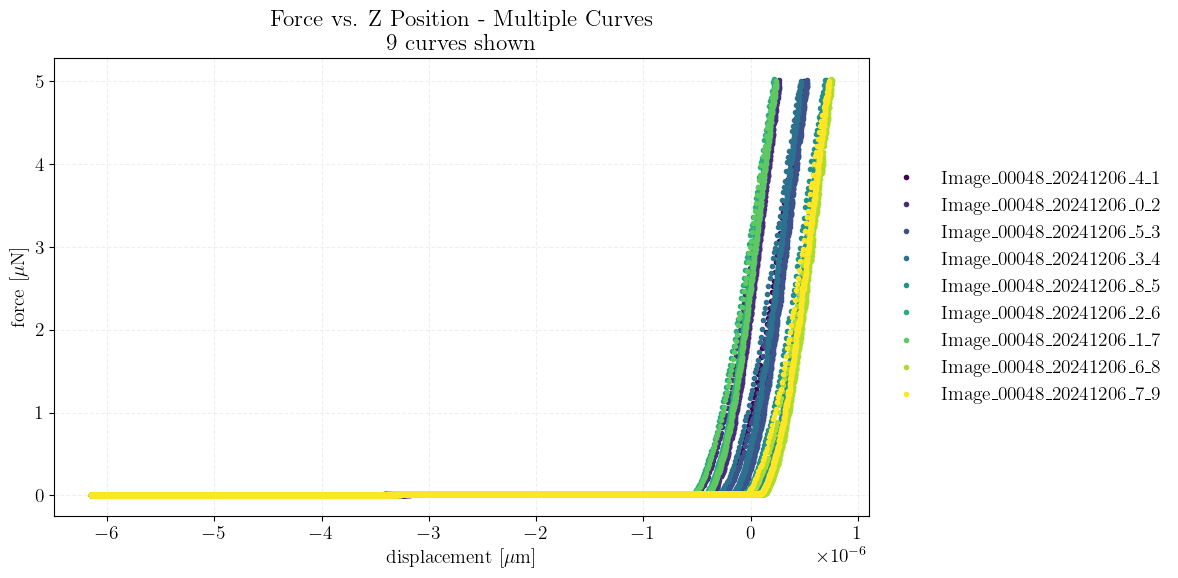

{'raw': {'force': array([-1.07577e-04,  1.88751e-04,  1.07503e-04, ...,  4.88934e+00,
        4.98596e+00,  5.01843e+00]), 'z': array([ 6.15000e-06,  6.14900e-06,  6.14800e-06, ..., -2.45462e-07,
       -2.55241e-07, -2.65020e-07]), 'time': array([0., 0., 0., ..., 0., 0., 0.])}, 'metadata': {'file': '\\\\d.ethz.ch\\groups\\mavt\\ecm\\Group\\File_Exchange\\Raoul_Paula\\2024_12_06\\afm_glass_pbs_calib\\Image_00048_20241206_0.txt'}}
{'raw': {'force': array([-4.91086e-05,  5.48456e-05,  5.20889e-05, ...,  4.93066e+00,
        5.00885e+00,  5.01306e+00]), 'z': array([ 6.15000e-06,  6.14900e-06,  6.14800e-06, ..., -5.07737e-07,
       -5.17514e-07, -5.27290e-07]), 'time': array([0., 0., 0., ..., 0., 0., 0.])}, 'metadata': {'file': '\\\\d.ethz.ch\\groups\\mavt\\ecm\\Group\\File_Exchange\\Raoul_Paula\\2024_12_06\\afm_glass_pbs_calib\\Image_00048_20241206_5.txt'}}
{'raw': {'force': array([ 5.07478e-05, -6.97095e-05,  5.73602e-05, ...,  4.88311e+00,
        4.95725e+00,  5.00883e+00]), 'z': arra

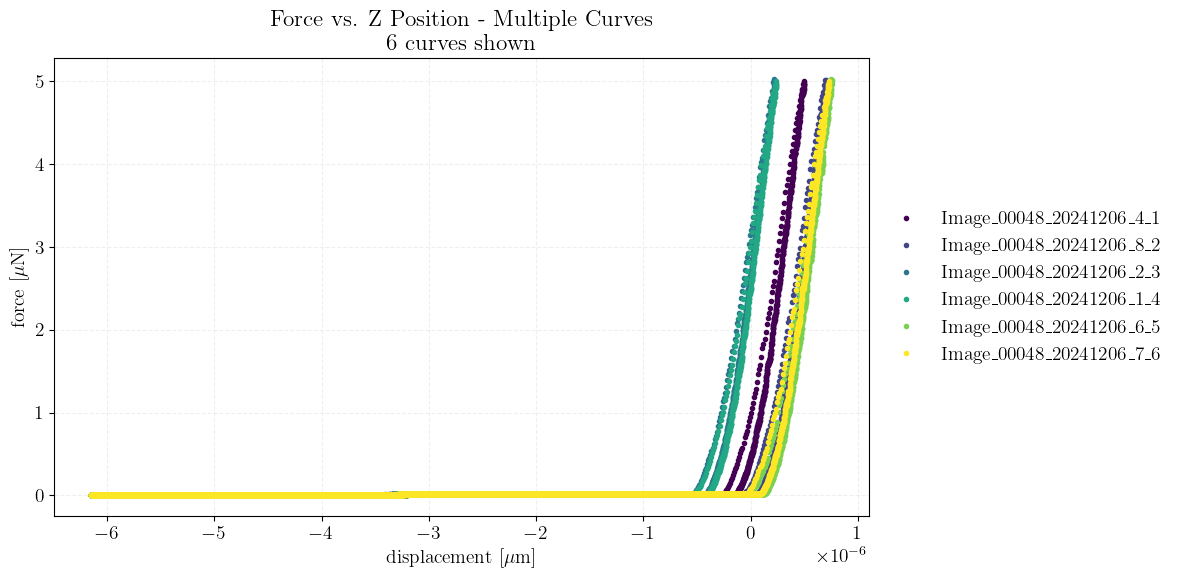

[{'raw': {'force': array([-1.07577e-04,  1.88751e-04,  1.07503e-04, ...,  4.88934e+00,
        4.98596e+00,  5.01843e+00]), 'z': array([ 6.15000e-06,  6.14900e-06,  6.14800e-06, ..., -2.45462e-07,
       -2.55241e-07, -2.65020e-07]), 'time': array([0., 0., 0., ..., 0., 0., 0.])}, 'metadata': {'file': '\\\\d.ethz.ch\\groups\\mavt\\ecm\\Group\\File_Exchange\\Raoul_Paula\\2024_12_06\\afm_glass_pbs_calib\\Image_00048_20241206_0.txt'}}, {'raw': {'force': array([-4.91086e-05,  5.48456e-05,  5.20889e-05, ...,  4.93066e+00,
        5.00885e+00,  5.01306e+00]), 'z': array([ 6.15000e-06,  6.14900e-06,  6.14800e-06, ..., -5.07737e-07,
       -5.17514e-07, -5.27290e-07]), 'time': array([0., 0., 0., ..., 0., 0., 0.])}, 'metadata': {'file': '\\\\d.ethz.ch\\groups\\mavt\\ecm\\Group\\File_Exchange\\Raoul_Paula\\2024_12_06\\afm_glass_pbs_calib\\Image_00048_20241206_5.txt'}}, {'raw': {'force': array([ 5.07478e-05, -6.97095e-05,  5.73602e-05, ...,  4.88311e+00,
        4.95725e+00,  5.00883e+00]), 'z': a

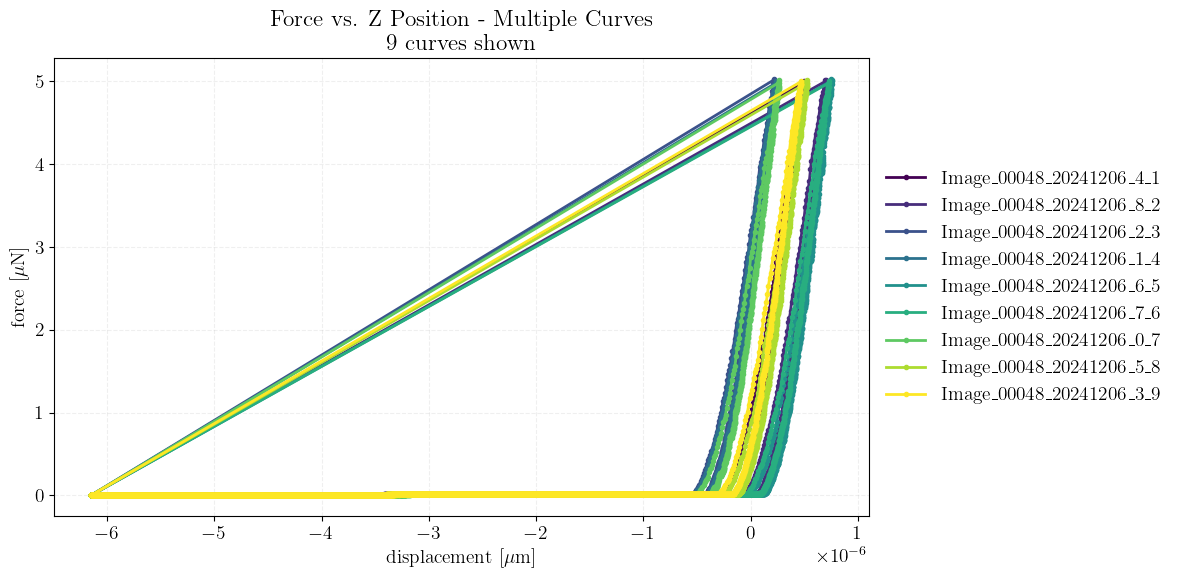

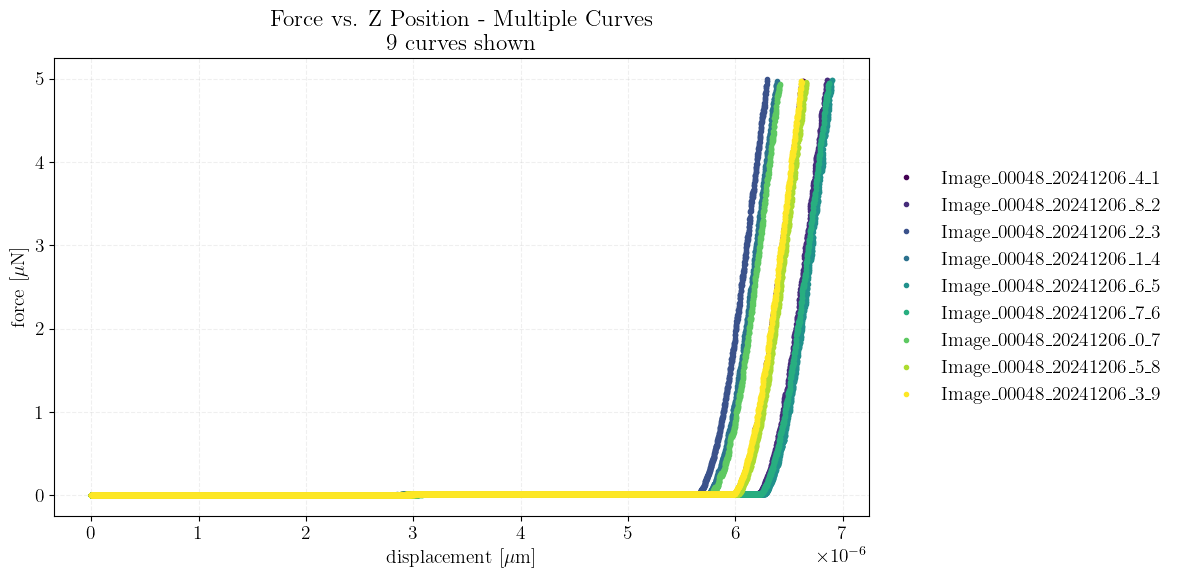

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [8]:
#paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_29\afm_pdms35t1_ethanol_no2\*.txt")
paths = glob.glob(r"G:\File_Exchange\Raoul_Paula\2024_12_06\afm_glass_pbs_calib\*.txt")

afm = IndentationSet(paths, exp_type="afmcalib")
afm.plot_all(linestyle="")

afm.delete_curves([1, 2, 3])

afm.plot_all(linestyle="")

afm.restore_all()

afm.plot_all(linestyle="-")

processing_pl = [crop_afm_temp, findContact_blackMagic]
#processing_pl = [partial(crop_start, ix_start=5000), crop_afm_temp, findContact_blackMagic]

afm.process_raw(processing_pl)

afm.plot_all(linestyle="")

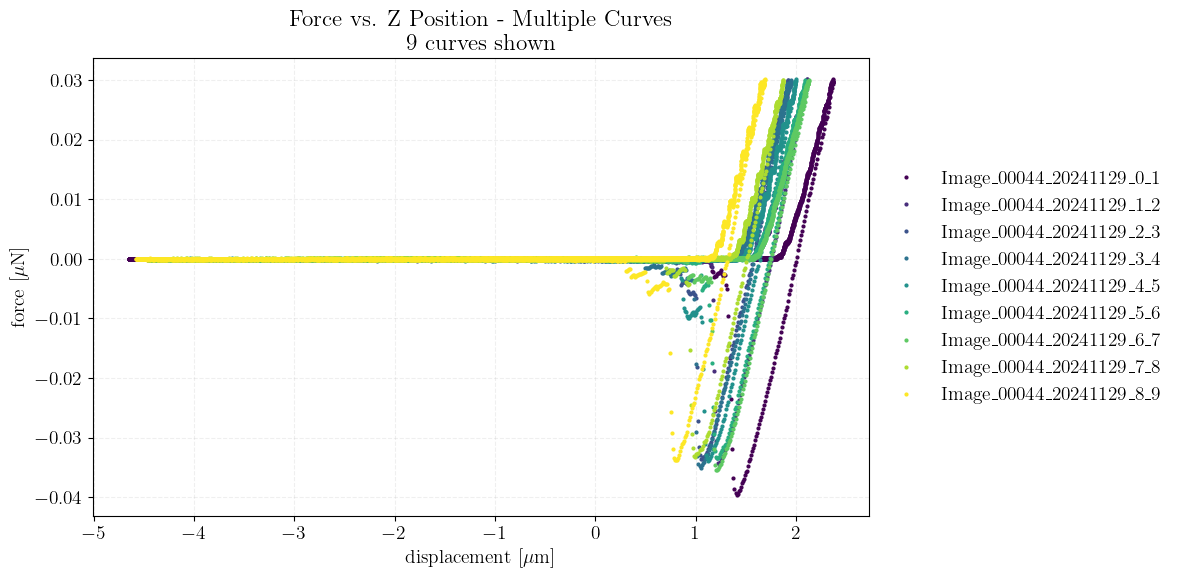

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [13]:
afm.plot_all_raw(marker="o", linestyle="", markersize=2)

128.6194445478352
127.92972154723189
127.8530546006596
127.25522731893199
128.47469428139388
128.960141876253
125.96138879864878
128.77460211303273
127.91145645624289
Mean and std: 127.97108128224778 0.8735873919104463


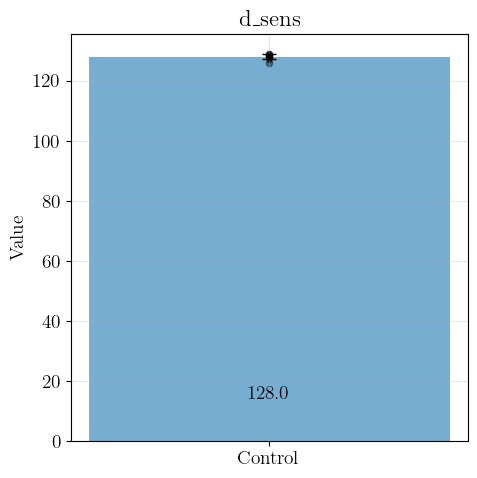

In [10]:
function_arguments = dict(keyname="d_sens")
afm.calculate_curve_parameter(function=parameter_defelection_sensitivity)
plot_curve_parameters_bar(afm,
                         parameter_names=["d_sens"],
                         labels=['Control'],
                         figsize=(5,5))

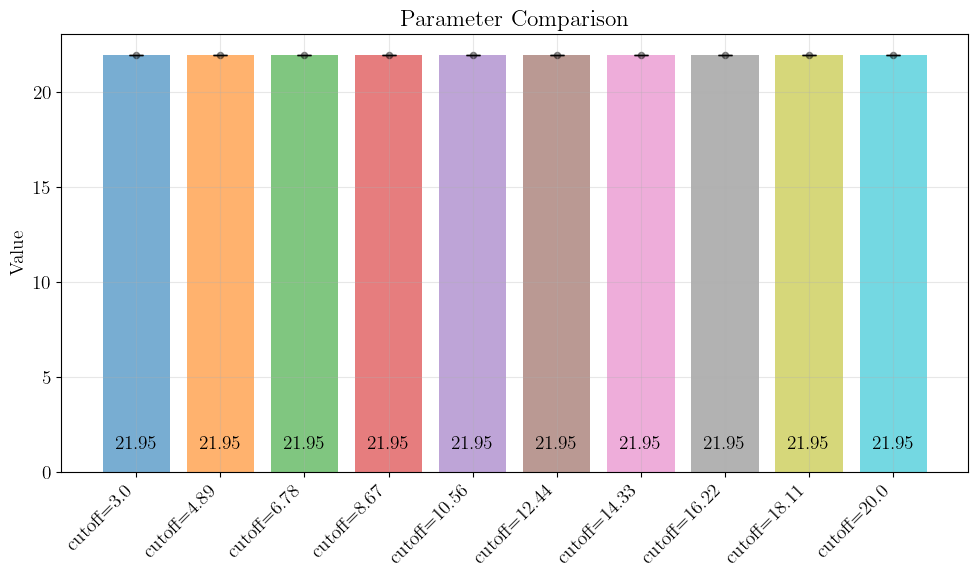

In [11]:
cutoffs = np.linspace(3, 20, 10)

for cutoff in cutoffs:
    function_arguments = dict(radius=5, nu=0.5, cutoff=cutoff, keyname="cutoff="+str(np.round(cutoff, 2)))
    afm.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_instance_parameters_bar(afm,
                         parameter_names=[*["cutoff="+str(np.round(cutoff, 2)) for cutoff in cutoffs]],
                         figsize=(10,6))